In [1]:
# data will be fed row by row

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('mnist_data')

Extracting mnist_data\train-images-idx3-ubyte.gz
Extracting mnist_data\train-labels-idx1-ubyte.gz
Extracting mnist_data\t10k-images-idx3-ubyte.gz
Extracting mnist_data\t10k-labels-idx1-ubyte.gz


In [4]:
# rows or n inputs
n_inputs = 28
# columns or timesteps or n_steps
n_steps = 28

In [5]:
x_data = tf.placeholder(tf.float32, shape=[None, 28*28])
x = tf.reshape(x_data, [-1, 28, 28])
y = tf.placeholder(tf.int32, shape=[None])

In [6]:
rnn_cell = tf.contrib.rnn.BasicRNNCell(num_units=5)

In [7]:
# https://stackoverflow.com/questions/48783798/whats-the-difference-between-data-time-major-and-batch-major --see docs of dynamic_rnn, time major 
output, states = tf.nn.dynamic_rnn(rnn_cell, x, dtype=tf.float32)

In [8]:
# states of previous timestep is used for the next timestep

In [9]:
output.shape

TensorShape([Dimension(None), Dimension(28), Dimension(5)])

In [12]:
logits = tf.layers.dense(states, 10)

In [13]:
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)

In [12]:
loss = tf.reduce_mean(xentropy)

In [13]:
optimiser = tf.train.AdamOptimizer()
train = optimiser.minimize(loss)

In [14]:
correct = tf.nn.in_top_k(logits, y, 1)

In [15]:
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [16]:
init = tf.global_variables_initializer()

In [25]:
with tf.Session() as sess:
    batch_size = 1
    epoch = 100
    sess.run(init)
    errors = []
    for i in range(epoch):
        batch = mnist.train.next_batch(batch_size)
        feed_dict = {x_data:batch[0], y:batch[1]}
        sess.run(train, feed_dict)
        errors.append(sess.run(loss, feed_dict))
    acc = sess.run(accuracy, feed_dict)

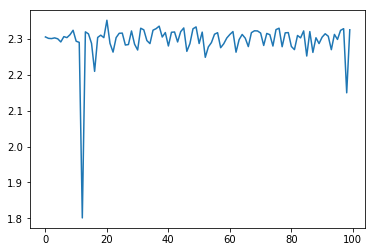

In [26]:
import matplotlib.pyplot as plt
plt.plot(errors)
plt.show()

In [28]:
acc

0.0